In [1]:
import os
import tarfile
import urllib

In [2]:
droot = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
hpath = os.path.join('datasets','housing')
hurl  = droot + "datasets/housing/housing.tgz"

In [4]:
def fetch_data(housing_url = hurl, housing_path = hpath):
    os.makedirs(housing_path,exist_ok = True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
import pandas as pd

In [6]:
def load_data(housing_path = hpath):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
fetch_data()
h_data = load_data()

In [8]:
h_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(h_data,test_size = 0.2,random_state = 42)

In [10]:
import numpy as np

In [12]:
h_data['income_cat'] = pd.cut(h_data['median_income'],bins = [0,1.5,3.0,4.5,6,np.inf],labels = [1,2,3,4,5])

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit as SSS
split = SSS(n_splits = 1,test_size = 0.2,random_state = 42)
for train_index,test_index in split.split(h_data,h_data['income_cat']):
    s_train_set = h_data.loc[train_index]
    s_test_set = h_data.loc[test_index]

In [16]:
for set_ in (s_train_set,s_test_set):
    set_.drop('income_cat',axis = 1,inplace = True)

In [17]:
data_2 = s_train_set.copy()

In [20]:
import matplotlib.pyplot as plt

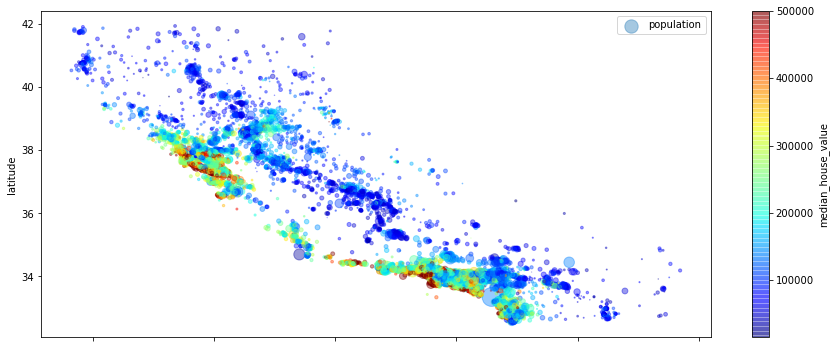

In [24]:
data_2.plot(kind = 'scatter',x = 'longitude',y = 'latitude',alpha = 0.4,s = data_2['population']/100,label = 'population',
           figsize = (15,6),c = "median_house_value",cmap = plt.get_cmap('jet'),colorbar = True)
plt.legend()

In [25]:
from pandas.plotting import scatter_matrix

In [26]:
cor_matirx = data_2.corr()
cor_matirx['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

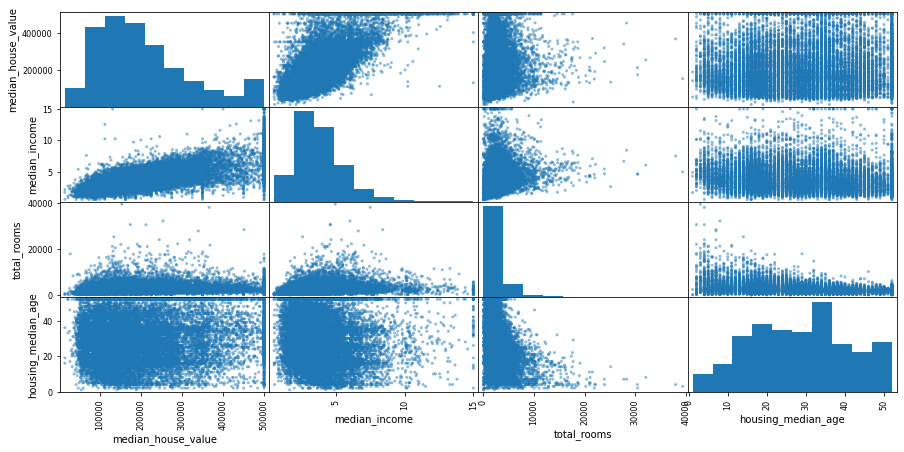

In [27]:
attri = ['median_house_value',"median_income","total_rooms","housing_median_age"]
scatter_matrix(data_2[attri],figsize = (15,7))

In [39]:
data_2 = s_train_set.drop('median_house_value',axis = 1)

In [43]:
house_label = s_train_set['median_house_value'].copy()

In [40]:
data_num = data_2.drop('ocean_proximity',axis = 1)

In [47]:
cat = ['ocean_proximity']

In [48]:
cat

['ocean_proximity']

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [49]:

num_features = list(data_num)

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),('std',StandardScaler())])
full_pipeline = ColumnTransformer([('num',num_pipeline,num_features),('cat',OneHotEncoder(),cat)])

In [50]:
final = full_pipeline.fit_transform(data_2)

In [51]:
final

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [64]:
from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor as Dtree
from sklearn.model_selection import cross_val_score as cv_score
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import GridSearchCV

In [53]:
lin_reg = lm()
lin_reg.fit(final,house_label)

LinearRegression()

In [58]:
lin_prediction = lin_reg.predict(final)

In [59]:
lin_mse = mse(house_label,lin_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

In [60]:
tree_reg = Dtree()
tree_reg.fit(final,house_label)

DecisionTreeRegressor()

In [61]:
Dtree_prediction = tree_reg.predict(final)

In [62]:
Dtree_mse = mse(house_label,Dtree_prediction)
Dtree_rmse = np.sqrt(Dtree_mse)
Dtree_rmse

0.0

In [65]:
Dtree_scores = cv_score(tree_reg,final,house_label,scoring = 'neg_mean_squared_error',cv = 10)
Dtree_score = np.sqrt(-Dtree_scores)

In [66]:
Dtree_score.mean()

69927.83678337855

In [67]:
Dtree_score.std()

2690.69803627589

In [68]:
lin_scores = cv_score(lin_reg,final,house_label,scoring = 'neg_mean_squared_error',cv = 10)
lin_score = np.sqrt(-lin_scores)

In [69]:
lin_score.mean()

69223.18594556303

In [70]:
lin_score.std()

2657.268311277697

In [71]:
rf_reg = rf()
rf_reg.fit(final,house_label)

RandomForestRegressor()

In [73]:
rf_prediction = rf_reg.predict(final)
rf_mse = mse(house_label,rf_prediction)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

18307.13163632441

In [74]:
rf_scores = cv_score(rf_reg,final,house_label,scoring = 'neg_mean_squared_error',cv = 10)
rf_score = np.sqrt(-rf_scores)

In [75]:
rf_score.mean()

49482.41949669346

In [76]:
rf_score.std()

1859.3035727246627

In [77]:
rf_reg.feature_importances_

array([1.07801118e-01, 1.04895775e-01, 5.20293674e-02, 2.50159083e-02,
       2.19279918e-02, 3.21256543e-02, 2.13972123e-02, 4.80762188e-01,
       3.28096005e-03, 1.43340531e-01, 3.69412487e-05, 9.30621976e-04,
       6.45573129e-03])

In [79]:
cat_names = list(full_pipeline.named_transformers_['cat'].categories_[0])
feature_names = num_features + cat_names

ValueError: shape mismatch: objects cannot be broadcast to a single shape

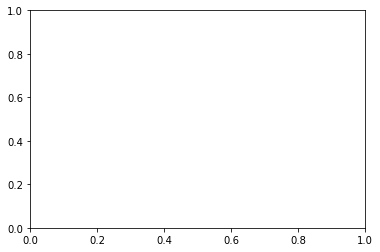

In [84]:
plt.bar(x = np.arange(10),height = rf_reg.feature_importances_)

In [87]:
sorted(zip(rf_reg.feature_importances_,feature_names),reverse = True)

[(0.48076218769886486, 'median_income'),
 (0.143340531003112, 'INLAND'),
 (0.107801117542515, 'longitude'),
 (0.10489577507909567, 'latitude'),
 (0.05202936740917108, 'housing_median_age'),
 (0.03212565429566647, 'population'),
 (0.025015908324877007, 'total_rooms'),
 (0.021927991830191878, 'total_bedrooms'),
 (0.02139721225178341, 'households'),
 (0.0064557312912192485, 'NEAR OCEAN'),
 (0.003280960048872123, '<1H OCEAN'),
 (0.0009306219758845647, 'NEAR BAY'),
 (3.694124874680193e-05, 'ISLAND')]

In [88]:
x_test = s_test_set.drop('median_house_value',axis = 1)
y_test = s_test_set['median_house_value'].copy()

In [93]:
test_data = full_pipeline.fit_transform(x_test)

In [96]:
def performance(mod,x,y):
    prediction = mod.predict(x)
    rmse = np.sqrt(mse(prediction,y))
    scores = cv_score(mod,x,y,scoring = 'neg_mean_squared_error',cv = 10)
    score = np.sqrt(-scores)
    print('rmse: ',rmse)
    print('cv_score_mean: ',score.mean())
    print('cv_score_std: ',score.std())

In [97]:
#linear regression model rmse and cv score on test dataset
performance(lin_reg,test_data,y_test)

rmse:  67352.37332470204
cv_score_mean:  67630.0765003779
cv_score_std:  2568.2422626649513


In [98]:
#Dtree
performance(tree_reg,test_data,y_test)

rmse:  74400.03480620481
cv_score_mean:  73493.35887138579
cv_score_std:  5311.865262673635


In [99]:
#Random forest
performance(rf_reg,test_data,y_test)

rmse:  53983.0363735293
cv_score_mean:  53950.58437746391
cv_score_std:  2425.5710884738683
